<a href="https://colab.research.google.com/github/fengfrankgthb/Demonstrations/blob/main/LIT_CeO2_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Showing text embeddings 2025.05.18

## 1. Install Necessary Libraries
* **sentence-transformers** This is the text embedding library
* **scikit-learn** This is the machine learning library
* **matplotlib** This is the mat-lab style plotting library

In [1]:
!pip install sentence-transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## 2. import necessary modules from the libraries



**mpl_toolkits.mplot3d**: matplot 3D plotting lib

**numpy**: Numerical Python, the fundamental python lib

**Axes3D** 3D plotting class

**PCA** Principal Components Analysis for linear dimension reduction.

**TSNE** t-SNE non-linear dimension reduction to creat more scattered effect

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# set matplot to inline (static) mode, or notebook for interactive mode)
# even though default is inline mode, be explicit to avoid any confusion
# the interactive notebook mode is often unstable at colab environment
# alternative is set as 'inline' and use 'plotly'.
%matplotlib inline

## 3. Imput text data

Choose one subsection below:

### 3.1 CeO2 Example

Used *118HHH Q1 on CeO2-NPs* for illustration, breaking into 9 components:

* Pa = All Sentences combined in Prompt
* P1 = 1st sentence in Prompt
* P2 = 2nd sentence in Prompt
* P3 = 3rd sentence in Prompt
* Q? = the Question sentence
* Ax = wrong choice A
* Bv = correct answer B
* Cx = wrong choice C
* Dx = wrong choice D

In [ ]:
# Example 1: CeO2 Question
# This is a *** question used to directly compare with 5Vs in section 8.1 and 8.2
sentences = ["Pa: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water. In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha). While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "P1: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water.",
    "P2: In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha).",
    "P3: While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "Q?: Which finding, if true, would most directly weaken the hypothesis presented in the text?",
    "Ax) When D. polymorpha and O. mykiss are exposed to similar levels of CeO2-NPs, concentrations of CeO2-NPs in animals of both species show little variation from individual to individual.",
    "Bv) The rate of CeO2-NPs uptake in D. polymorpha differs from the rate of CeO2-NPs uptake in O. mykiss in a way that is not yet well understood by researchers.",
    "Cx) D.polymorpha has been shown to accumulate several other types of manufactured nanoparticles in addition to CeO2-NPs, whereas O. mykiss has been shown to accumulate only CeO2-NPs.",
    "Dx) Compared with O. mykiss, D.polymorpha can accumulate detectable CeO2-NPs concentrations with significantly fewer negative effects."
]

### 3.2 Other Examples:

* Queen Egypt
* LNH

In [ ]:
# Example 2: Queen Egypt
# This is ** question used to discover abreviation bias among choices
sentences = ["Pa: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh. Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh. The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices. Whether Merneith was a pharaoh or not, this discovery supports the idea that Merneith likely _______",
    "P1: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh.",
    "P2: Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh.",
    "P3: The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices.",
    "Q?: Whether Merneith was a pharaoh or not, this discovery supports the idea that Merneith likely _______ (choose from Av, Bx, Cx, and Dx). ",
    "Av) had an important role in Egypt’s government.",
    "Bx) lived after rather than before the First Dynasty of Egypt.",
    "Cx) traveled beyond Egypt’s borders often.",
    "Dx) created a new form of writing in Egypt."
]


In [ ]:
# Alternative Example 2: Queen Egypt amended
# This is the revised the example 2 to disclose abreviation bias among choices.
sentences = ["Pa: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh. Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh. The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices. Whether Merneith was a pharaoh or not, this discovery supports the idea that Merneith likely _______",
    "P1: Archaeologist Christiana Kohler and her team excavated the Egyptian tomb of Queen Merneith, the wife of a First Dynasty pharaoh.",
    "P2: Some scholars claim that she also ruled Egypt on her own and was actually the first female pharaoh.",
    "P3: The team found a tablet in Merneith’s tomb with writing suggesting that she was in charge of the country’s treasury and other central offices.",
    "Q?: This discovery supports that _______ (choose from Av, Bx, Cx, and Dx)?",
    "Av) Merneith likely had a role in her government",
    "Bx) Merneith likely lived after the First Dynasty",
    "Cx) Merneith likely traveld beyond Egypt borders",
    "Dx) Merneith likely created an Egptian writing."
]


In [ ]:
# Example 3: LNH Study
# This is a *** question used to discover peripheral bias in text.
sentences = ["Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "P1: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules.",
    "P2: Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’ claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion and between grammatical complexity and informativity",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between fusion and exotericity and between informativity and exotericity."
]

In [ ]:
# Alternative Example 3: LNH Study
# This is the revised Example 3 to disclose peripheral bias in text.
sentences = ["Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "P1: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules.",
    "P2: Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Pa: The linguistic niche hypothesis (LNH) posits that the exotericity of languages (how prevalent non-native speakers are) and grammatical complexity are inversely related, which the LNH ascribes to attrition of complex grammatical rules as more non-native speakers adopt the language but fail to acquire those rules. Focusing on two characteristics that are positive indices of grammatical complexity, fusion (when new phonemes arise from the merger of previously distinct ones) and informativity (languages’ capacity for meaningful variation), Olena Shcherbakova and colleagues conducted a quantitative analysis for more than 1,300 languages and claim the outcome is inconsistent with the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’ claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion and between grammatical complexity and informativity",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical fusion and exotericity and between grammatical informativity and exotericity."
]

In [4]:
# Alternative Example 3: LNH Study
# This is the revised Example 3 to discover long-comp confusion in text.
sentences = ["Pa: The Linguistic Niche Hypothesis (LNH) suggests that as more non-native speakers adopt a language, its grammatical complexity decreases. This occurs because these speakers often do not fully acquire complex grammatical rules. Olena Shcherbakova and her colleagues focused on two measures of grammatical complexity: fusion (the merging of distinct phonemes) and informativity (the capacity for meaningful variation). They analyzed over 1,300 languages and found their results contradict the LNH.",
    "P1: The Linguistic Niche Hypothesis (LNH) suggests that as more non-native speakers adopt a language, its grammatical complexity decreases. This occurs because these speakers often do not fully acquire complex grammatical rules.",
    "P2: Olena Shcherbakova and her colleagues focused on two measures of grammatical complexity: fusion (the merging of distinct phonemes) and informativity (the capacity for meaningful variation).",
    "P3: They analyzed over 1,300 languages and found their results contradict the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and fusion, as well as a slightly negative correlation between grammatical complexity and informativity.",
    "Bx) Shcherbakova and colleagues’ analysis showed a slightly negative correlation between grammatical complexity and exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical complexity and fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed a slightly positive correlation between grammatical fusion and exotericity, as well as a slightly positive correlation between grammatical informativity and exotericity."
]

In [8]:
# Alternative Example 3: LNH Study
# This is the revised Example 3 to disclose multi-rel confusion in text.
sentences = ["Pa: LNH suggests that exotericity ≠ complexity, and exotericity = non-native speakers. Olena Shcherbakova and her colleagues focused on two measures: 1) fusion = complexity, and 2) informativity = complexity. They analyzed over 1,300 languages and found their results contradict the LNH.",
    "P1: LNH suggests that exotericity ≠ complexity, and exotericity = non-native speakers.",
    "P2: Olena Shcherbakova and her colleagues focused on two measures: 1) fusion = complexity, and 2) informativity = complexity.",
    "P3: They analyzed over 1,300 languages and found their results contradict the LNH.",
    "Q?: Which finding, if true, would most directly support Shcherbakova and colleagues’claim?",
    "Ax) Shcherbakova and colleagues’ analysis showed complexity ≠ fusion, as well as complexity ≠ informativity.",
    "Bx) Shcherbakova and colleagues’ analysis showed complexity ≠ exotericity.",
    "Cx) Shcherbakova and colleagues’ analysis showed complexity = fusion.",
    "Dv) Shcherbakova and colleagues’ analysis showed fusion = exotericity, as well as informativity = exotericity."
]

## 4. Generate Embeddings for CeO2 Sample Sentences.

Used a pre-trained Sentence Transformer model, `all-mpnet-base-v2`, to generate embeddings for each sentence. This model is a good general-purpose choice, with mapping of sentences & paragraphs to a **768** dimensional dense vector space and can be used for tasks like clustering or semantic search.

`all-mpnet-base-v2`: is a sentence transformer model that converts sentences and paragraphs into numerical vectors. These vectors, called embeddings, capture the semantic meaning of the text.

**Key Features and What it's Used For**:
* Sentence Embeddings: The model takes a sentence (or short paragraph) as input and produces a dense vector representation.
* 768 Dimensions: is a common dimensionality for these types of models.
* MPNet Architecture: is a model that combines the strengths of BERT and XLNet to better understand word order and context.
* General Purpose: `all-mpnet-base-v2` is designed to be a general-purpose model, meaning it performs well on a variety of tasks.

**Common Applications**:
* Semantic Search: Finding sentences or documents with similar meanings.
* Information Retrieval: Pulling up relevant information based on a text query.
* Clustering: Grouping sentences or paragraphs with similar meanings.
* Sentence Similarity: Measuring how alike two pieces of text are.

**How to Use It** (in Python with Sentence Transformers):

    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('all-mpnet-base-v2')
        sentences = [
        "This is a simple example.",
        "Here is another sentence.",
        "A third sentence for demonstration."
    ]
    embeddings = model.encode(sentences)
    print(embeddings)  # Output: A list of 768-dimensional vectors

**Why is it Popular?**
* Inclusive dataset: a massive dataset of over 1 billion sentence pairs from
Natural Language Inference (NLI) datasets, Paraphrase datasets, and a large collection of other published English data from various sources.
* Good Performance: It generally ranks high in accuracy for many semantic text understanding tasks.
* Efficiency: While very effective, it's also relatively efficient to use.
* Ease of Use: Libraries like Sentence Transformers make it very easy to download and use.

In [9]:
# Load the pre-trained model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate the embeddings
embeddings = model.encode(sentences)

print("Shape of embeddings:", embeddings.shape)
print("Example embedding (first sentence):\n", embeddings[8][:100]) # Print the first 20 dimensions only

Shape of embeddings: (9, 768)
Example embedding (first sentence):
 [ 2.2559572e-02 -2.2528339e-02 -1.9161521e-02 -1.6168736e-02
  1.0458729e-02  2.2974724e-02 -2.4001436e-02  3.2299317e-02
 -3.6514625e-02  8.5962182e-03 -1.4380489e-02 -4.3045711e-03
  8.0601154e-03  7.9565793e-02  1.9122688e-02 -3.0720243e-03
  1.5826859e-02 -6.7560757e-03 -4.7495138e-02  7.5067552e-03
 -3.6263160e-02 -3.1859014e-02 -1.2297756e-02 -9.7409887e-03
  6.2833346e-02 -2.4564937e-02  3.3150623e-03 -5.3084320e-03
  2.4660094e-02  3.2327183e-02 -2.0284852e-02  3.3536322e-02
 -4.5617137e-02  9.1986164e-02  1.6633791e-06 -7.8308523e-02
 -2.3821795e-02  2.3956301e-02 -1.8336186e-02  9.8458547e-03
 -5.9070911e-02  2.1326898e-02  1.0997122e-02 -2.0449480e-02
 -3.7546542e-02  1.2314477e-02  6.2099822e-02  3.8539101e-03
 -3.6306821e-02  7.5962073e-03  1.8047284e-02  1.8923745e-02
  5.7574075e-02 -3.2244503e-02  5.3387813e-02  6.8920083e-02
  1.4161044e-04 -6.8255335e-02 -3.2878332e-02 -7.0262095e-04
 -1.1688958e-02  9

## 5. Reduce Dimensionality: 2D with PCA

**PCA** = principal component analysis.

Principal Components are composite dimensions from the existing 768-dimention embedding dataset. It helps to reduce dimensions while maintaning the most variances mathematically, thus being able to discern the most of datapoints. The ability to discern things is simply the intelligence, or smartness.

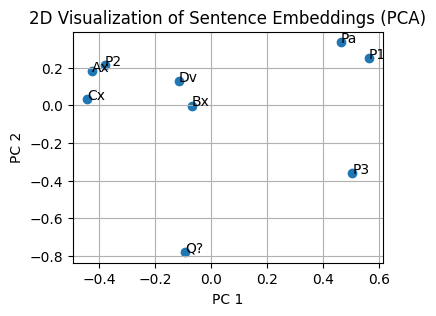

In [10]:
# Reduce to 2 dimensions using PCA
pca_2d = PCA(n_components=2)
reduced_embeddings_2d = pca_2d.fit_transform(embeddings)

# Visualize the 2D embeddings
plt.figure(figsize=(4, 3))
plt.scatter(reduced_embeddings_2d[:, 0], reduced_embeddings_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_2d[i, 0], reduced_embeddings_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

## 6. Reduce Dimensionality: 3D with PCA

### 6.1 3D PCA static

In [ ]:
# Reduce to 3 dimensions using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(8, 6))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_3d[i, 0], reduced_embeddings_3d[i, 1], reduced_embeddings_3d[i, 2], txt[:2])

ax_3d.set_xlabel("PC 1")
ax_3d.set_ylabel("PC 2")
ax_3d.set_zlabel("PC 3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (PCA)")
plt.show()

### 6.2 3D PCA rotational with P-tet

Question domain is illustrated in P-tet. Choices relation to Prompt-Question is shown by the distance from Choice to P-tet.

In [11]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

labels = [s[:2] for s in sentences]  # Get first two letters.

# Perform PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Directly define the indices, assuming P1, P2, P3, Q? are at indices 1, 2, 3, and 4
p1_index = 1
p2_index = 2
p3_index = 3
q_index = 4

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_embeddings_3d[p1_index]
p2_coords = reduced_embeddings_3d[p2_index]
p3_coords = reduced_embeddings_3d[p3_index]
q_coords = reduced_embeddings_3d[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}'
        )
    )

# Create the 3D scatter plot and add the lines
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    mode='markers+text',
    text=labels,  # Use first 2 characters of labels
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'
)] + lines)  # Combine scatter and lines

# Set the title and axis labels
fig.update_layout(
    title="3D PCA Visualization with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True
)

# Show the plot
fig.show()



### 6.3 3D PCA from multiple angles static

In case rotational view above isn't available at temp environment, use multi-angle to illustrate.

In [ ]:
# PCA from multiple angles static views
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

#Create various angles for multiple 3-D rendering
elevations = [30, 30, 0, -30]  # Angles of elevation
azim_angles = [0, 45, 90, 135] # Azimuthal angles

for i, (elev, azim) in enumerate(zip(elevations, azim_angles)):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])
    for j, txt in enumerate(sentences):
        ax.text(reduced_embeddings_3d[j, 0], reduced_embeddings_3d[j, 1], reduced_embeddings_3d[j, 2], txt[:2])
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")
    ax.view_init(elev=elev, azim=azim)
    plt.title(f"3D Plot (Elev={elev}, Azim={azim})")
    plt.show()

## 7. Using t-SNE for Dimensionality Reduction

**t-SNE** = t-distributed stochastic neighbor embedding. Unlike **PCA**, **t-SNE** demonstrate the embeddings in non-linear more scattered fashion.


### 7.1 2D t-SNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2 dimensions using t-SNE with a lower perplexity
tsne_2d = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1)) # Set perplexity <= 5 or n_samples - 1
reduced_embeddings_tsne_2d = tsne_2d.fit_transform(embeddings)

# Visualize the 2D embeddings (t-SNE)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_tsne_2d[:, 0], reduced_embeddings_tsne_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_tsne_2d[i, 0], reduced_embeddings_tsne_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (t-SNE)")
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")
plt.grid(True)
plt.show()

###7.2 3D t-SNE static

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 dimensions using t-SNE with a lower perplexity
tsne_3d = TSNE(n_components=3, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1))
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(4, 3))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_tsne_3d[:, 0], reduced_embeddings_tsne_3d[:, 1], reduced_embeddings_tsne_3d[:, 2])

# Annotate each point with the first letter of the sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_tsne_3d[i, 0], reduced_embeddings_tsne_3d[i, 1], reduced_embeddings_tsne_3d[i, 2], txt[:2])

ax_3d.set_xlabel("t-SNE D1")
ax_3d.set_ylabel("t-SNE D2")
ax_3d.set_zlabel("t-SNE D3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (t-SNE)")
plt.show()

###7.3 3D t-SNE rotational

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have your data in a variable called 'embeddings'
# For example, let's create some dummy data for demonstration:
embeddings = np.random.rand(9, 5)  # 9 samples, 5 dimensions
sentences = [
    "Pa: Some fuel additives",
    "P1: Some fuel additives",
    "P2: In a 2015 study",
    "P3: While bioaccumulation",
    "Q?: Which finding",
    "Ax) When D. polymorpha",
    "Bv) The rate of CeO2-NPs",
    "Cx) D.polymorpha has been",
    "Dx) Compared with O. mykiss"
]
labels = [s[:2] for s in sentences]  # Get first two letters.

# Perform PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
reduced_embeddings_tsne_3d = pca_3d.fit_transform(embeddings)

# Directly define the indices, assuming P1, P2, P3, Q? are at indices 1, 2, 3, and 4
p1_index = 1
p2_index = 2
p3_index = 3
q_index = 4

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_embeddings_tsne_3d[p1_index]
p2_coords = reduced_embeddings_tsne_3d[p2_index]
p3_coords = reduced_embeddings_tsne_3d[p3_index]
q_coords = reduced_embeddings_tsne_3d[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}'
        )
    )

# Create the 3D scatter plot and add the lines
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_tsne_3d[:, 0],
    y=reduced_embeddings_tsne_3d[:, 1],
    z=reduced_embeddings_tsne_3d[:, 2],
    mode='markers+text',
    text=labels,  # Use first 2 characters of labels
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'
)] + lines)  # Combine scatter and lines

# Set the title and axis labels
fig.update_layout(
    title="3D PCA Visualization with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True
)

# Show the plot
fig.show()


## 8. How about 5-Vs?

### 8.1 Initialized 5V (CL 1wk + DR 1wk)

Below is a typical preception with inital training/ While erros exist across V2/V3/V4/V5, the student can vaguely see the correct answer Bv from the wrong choices Ax, Cx, and Dx.

5Vs---Pa---P1---P2---P3---Q?---Ax---Bv---Cx---Dx---

V1-----0-----1-----0------0-----1------0-----1-----0-----1---

V2-----1-----0----0.5---1------0-----0----0.5----0-----0---

V3-----1-----0----0.5---1-----1------1-----1-----1-----1---

V4-----0-----1-----0-----0-----1------0-----1----0.5----1---

V5-----0-----1-----0----0.5----0------0-----0-----0-----1---

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,0
P1,0,0,0,1,1
P2,0,0.5,0.5,0,0
P3,0,1,1,0,0.5
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0.5,1,1,0
Cx,0,0,1,0.5,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'  # Add a name for the scatter plot
)

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}' # Add a name for each line.
        )
    )

# Combine scatter and lines
data = [scatter] + lines

# Set the title and axis labels
layout = go.Layout(
    title="3D PCA of Data with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True #show legend
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot (this will display an interactive plot in Colab)
fig.show()


### 8.2 Well-Trained 5Vs: CL 1wk + DP/BT>=1month

Below is a typical preception with 1+month training. Correct answer falls directly into the prompt/question subspace.

5Vs---Pa---P1---P2---P3---Q?---Ax---Bv---Cx---Dx---

V1-----0-----1-----0------0-----1------0-----1-----0-----1---

V2-----1-----0-----1-----1------0------0-----0-----0-----0---

V3-----1-----0-----1------1-----1------1-----1-----1-----1---

V4-----0-----1-----0-----0-----1------0------1-----1-----1---

V5-----0-----1-----0-----1-----0------0------0-----0-----1---

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,1
P1,1,0,0,1,1
P2,0,1,1,0,0
P3,0,1,1,0,1
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0,1,1,0
Cx,0,0,1,1,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'  # Add a name for the scatter plot
)

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}' # Add a name for each line.
        )
    )

# Combine scatter and lines
data = [scatter] + lines

# Set the title and axis labels
layout = go.Layout(
    title="3D PCA of Data with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True #show legend
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot (this will display an interactive plot in Colab)
fig.show()
